In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-5


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search gpt2, learning rate 1e-05 focal loss, gamma: 2


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	4.5906	Val Loss:	1.7654	Accuracy:	0.3109	F1:	0.2823
2 / 20: Train Loss:	2.8823	Val Loss:	1.5894	Accuracy:	0.3025	F1:	0.2760
3 / 20: Train Loss:	2.5470	Val Loss:	1.4070	Accuracy:	0.2941	F1:	0.2755
4 / 20: Train Loss:	2.1027	Val Loss:	1.3278	Accuracy:	0.3445	F1:	0.3322
5 / 20: Train Loss:	1.9477	Val Loss:	1.2782	Accuracy:	0.3529	F1:	0.3421
6 / 20: Train Loss:	1.8785	Val Loss:	1.2353	Accuracy:	0.3866	F1:	0.3803
7 / 20: Train Loss:	1.6408	Val Loss:	1.2214	Accuracy:	0.3613	F1:	0.3561
8 / 20: Train Loss:	1.6396	Val Loss:	1.1991	Accuracy:	0.4202	F1:	0.4112
9 / 20: Train Loss:	1.6746	Val Loss:	1.1787	Accuracy:	0.4706	F1:	0.4653
10 / 20: Train Loss:	1.5765	Val Loss:	1.1685	Accuracy:	0.4706	F1:	0.4660
11 / 20: Train Loss:	1.4226	Val Loss:	1.1624	Accuracy:	0.4538	F1:	0.4483
12 / 20: Train Loss:	1.4236	Val Loss:	1.1394	Accuracy:	0.5210	F1:	0.5195
13 / 20: Train Loss:	1.5221	Val Loss:	1.1322	Accuracy:	0.5294	F1:	0.5310
14 / 20: Train Loss:	1.4040	Val Loss:	1.1252	Accuracy:	0.529

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	3.9937	Val Loss:	1.7660	Accuracy:	0.3109	F1:	0.2822
2 / 20: Train Loss:	2.2477	Val Loss:	1.5889	Accuracy:	0.2941	F1:	0.2666
3 / 20: Train Loss:	1.8481	Val Loss:	1.4079	Accuracy:	0.3109	F1:	0.2959
4 / 20: Train Loss:	1.3987	Val Loss:	1.3233	Accuracy:	0.3277	F1:	0.3133
5 / 20: Train Loss:	1.2283	Val Loss:	1.2797	Accuracy:	0.3529	F1:	0.3424
6 / 20: Train Loss:	1.1284	Val Loss:	1.2418	Accuracy:	0.3613	F1:	0.3558
7 / 20: Train Loss:	0.9430	Val Loss:	1.2325	Accuracy:	0.3445	F1:	0.3326
8 / 20: Train Loss:	0.9227	Val Loss:	1.2135	Accuracy:	0.3866	F1:	0.3735
9 / 20: Train Loss:	0.9712	Val Loss:	1.1965	Accuracy:	0.4202	F1:	0.4132
10 / 20: Train Loss:	0.8922	Val Loss:	1.1895	Accuracy:	0.4454	F1:	0.4370
11 / 20: Train Loss:	0.7524	Val Loss:	1.1843	Accuracy:	0.4202	F1:	0.4077
12 / 20: Train Loss:	0.7472	Val Loss:	1.1692	Accuracy:	0.4538	F1:	0.4506
13 / 20: Train Loss:	0.8149	Val Loss:	1.1640	Accuracy:	0.4958	F1:	0.4964
14 / 20: Train Loss:	0.7293	Val Loss:	1.1591	Accuracy:	0.512

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	3.2579	Val Loss:	1.7326	Accuracy:	0.2941	F1:	0.2582
2 / 20: Train Loss:	1.5609	Val Loss:	1.6026	Accuracy:	0.3109	F1:	0.2782
3 / 20: Train Loss:	1.1225	Val Loss:	1.4177	Accuracy:	0.2857	F1:	0.2609
4 / 20: Train Loss:	0.7450	Val Loss:	1.3254	Accuracy:	0.3109	F1:	0.2960
5 / 20: Train Loss:	0.6070	Val Loss:	1.3012	Accuracy:	0.3277	F1:	0.3093
6 / 20: Train Loss:	0.5347	Val Loss:	1.2593	Accuracy:	0.3193	F1:	0.3064
7 / 20: Train Loss:	0.4018	Val Loss:	1.2562	Accuracy:	0.3277	F1:	0.2977
8 / 20: Train Loss:	0.3962	Val Loss:	1.2375	Accuracy:	0.3361	F1:	0.3098
9 / 20: Train Loss:	0.4291	Val Loss:	1.2209	Accuracy:	0.3109	F1:	0.2991
10 / 20: Train Loss:	0.3652	Val Loss:	1.2124	Accuracy:	0.3361	F1:	0.3238
11 / 20: Train Loss:	0.2644	Val Loss:	1.2134	Accuracy:	0.3277	F1:	0.3042
12 / 20: Train Loss:	0.2560	Val Loss:	1.1983	Accuracy:	0.3782	F1:	0.3770
13 / 20: Train Loss:	0.2813	Val Loss:	1.1953	Accuracy:	0.3950	F1:	0.3907
14 / 20: Train Loss:	0.2454	Val Loss:	1.1921	Accuracy:	0.403

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	2.5661	Val Loss:	1.6467	Accuracy:	0.2521	F1:	0.2263
2 / 20: Train Loss:	1.0087	Val Loss:	1.5106	Accuracy:	0.2857	F1:	0.2470
3 / 20: Train Loss:	0.6561	Val Loss:	1.3644	Accuracy:	0.2941	F1:	0.2748
4 / 20: Train Loss:	0.3669	Val Loss:	1.3126	Accuracy:	0.2857	F1:	0.2719
5 / 20: Train Loss:	0.2688	Val Loss:	1.2883	Accuracy:	0.2689	F1:	0.2506
6 / 20: Train Loss:	0.2160	Val Loss:	1.2720	Accuracy:	0.2773	F1:	0.2533
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.29      0.53      0.38        38
oversimplification       0.29      0.28      0.29        36
slothful induction       0.18      0.07      0.10        45

          accuracy                           0.28       119
         macro avg       0.25      0.29      0.25       119
      weighted avg       0.25      0.28      0.24       119

test results:
                    precision    recall  f1

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

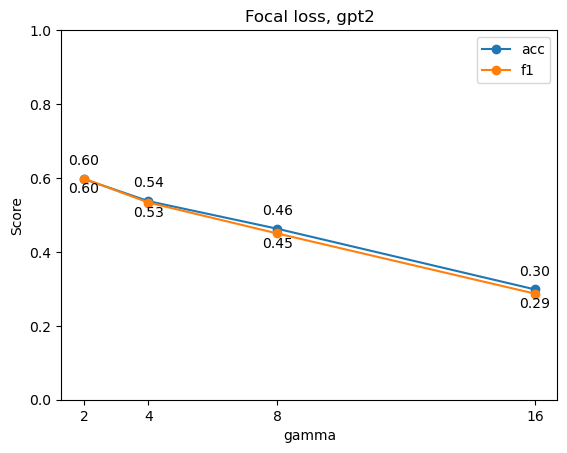

In [6]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')